In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import wandb
from wandb import keras
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

In [ ]:
run = wandb.init(project="fellow_and_clergyman")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
config = wandb.config

In [ ]:
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models.keras"),
]

### Preparing Dataset

In [ ]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/fellow and clergyman/fellow-and-clergyman"
width = height = 224

image_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,

    #data augmentation
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
)

train_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='training',
    shuffle=True,
    batch_size=32
)

validation_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='validation',
    shuffle=False,
    batch_size=32
)

Found 421 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
next(train_data)[0].shape

(30, 224, 224, 3)

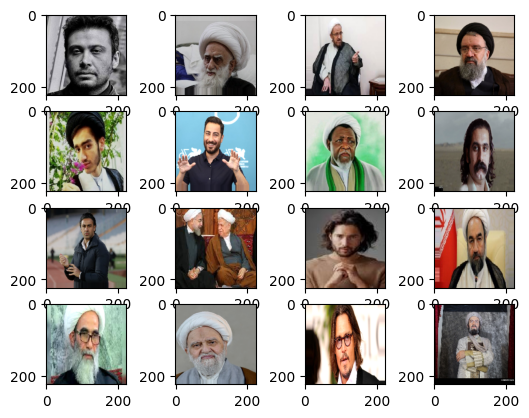

In [ ]:
train_images = next(train_data)[0]

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i])

### Create Model

In [ ]:
base_model = tf.keras.applications.MobileNetV2()

In [ ]:
base_model.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_203 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 111, 111, 32)   │             96 │ conv2d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_204 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 109, 109, 32)   │             96 │ conv2d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_205 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 109, 109, 64)   │            192 │ conv2d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_205[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_206 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_206   │ (None, 54, 54, 80)     │            240 │ conv2d_206[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_206            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)  

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 3,196,416 (12.19 MB)

 Non-trainable params: 51,140,320 (195.08 MB)

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

In [ ]:
base_model.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_609 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_609   │ (None, 111, 111, 32)   │             96 │ conv2d_609[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_609            │ (None, 111, 111, 32)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_610 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_609[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_610   │ (None, 109, 109, 32)   │             96 │ conv2d_610[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_610            │ (None, 109, 109, 32)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_611 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_610[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_611   │ (None, 109, 109, 64)   │            192 │ conv2d_611[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_611            │ (None, 109, 109, 64)   │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_611[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_612 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_612   │ (None, 54, 54, 80)     │            240 │ conv2d_612[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_612            │ (None, 54, 54, 80)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_613 (Conv2D)  

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 54,276,192 (207.05 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [ ]:
for layer in base_model.layers[0:-4]:
    layer.trainable=False

In [ ]:
base_model.summary()

In [ ]:
model = Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

ValueError: Undefined shapes are not supported.

In [ ]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),      #0.0001
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20
                    # callbacks=wandb_callbacks
                    )

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step - accuracy: 0.9884 - loss: 0.0409 - val_accuracy: 0.9333 - val_loss: 0.2619
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 0.9333 - val_loss: 0.2388
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 0.9947 - loss: 0.0295 - val_accuracy: 0.9333 - val_loss: 0.2504
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.9964 - loss: 0.0241 - val_accuracy: 0.9333 - val_loss: 0.3176
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.9922 - loss: 0.0291 - val_accuracy: 0.9333 - val_loss: 0.2480
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.9333 - val_loss: 0.2226
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9333 - val_loss: 0.3109
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 512ms/step - accuracy: 0.9972 - loss: 0.0165 - val_accu

In [ ]:
# accuracy: 0.9924 - loss: 0.0163 - val_accuracy: 0.9333 - val_loss: 0.3287

In [ ]:
loss , accuracy = model.evaluate(validation_data)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9347 - loss: 0.3183
validation loss: 0.33158254623413086
validation accuracy: 0.9333333373069763


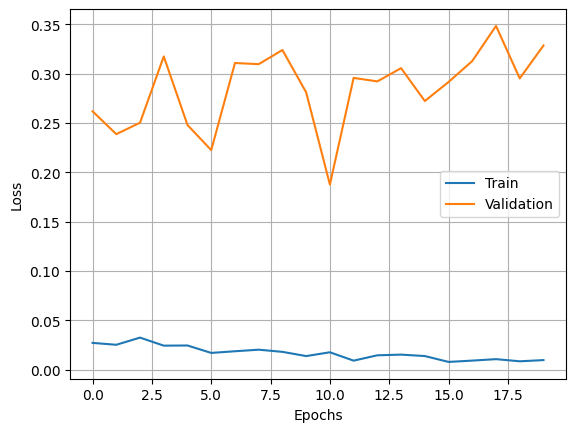

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

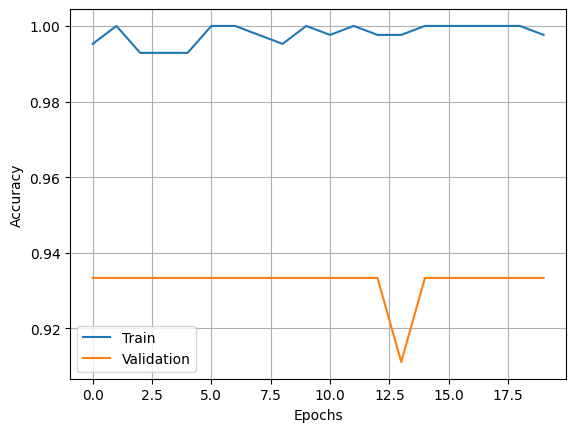

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/fellow and clergyman/weights/fellow_and_clergyman.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/fellow and clergyman/weights/fellow_and_clergyman.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data.class_indices

{'clergyman': 0, 'fellow': 1}

In [ ]:
train_data.class_indices.values()

dict_values([0, 1])

In [ ]:
labels_list = []
for value in train_data.class_indices.values():
    labels_list.append(value)

labels_list

[0, 1]

In [ ]:
y_pred = model.predict(validation_data)
y_predict = np.argmax(y_pred , axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step


In [ ]:
print(y_pred)
print(y_predict)

[[9.99869347e-01 1.30602304e-04]
 [9.99982834e-01 1.71783304e-05]
 [9.99979258e-01 2.07787707e-05]
 [9.99999762e-01 1.93142952e-07]
 [9.99291539e-01 7.08442938e-04]
 [1.00000000e+00 6.44724230e-09]
 [9.99529183e-01 4.70729690e-04]
 [9.99996185e-01 3.81601421e-06]
 [9.99981403e-01 1.86287634e-05]
 [9.99556243e-01 4.43684665e-04]
 [9.99942660e-01 5.72966019e-05]
 [9.99756634e-01 2.43322618e-04]
 [9.99999046e-01 9.49761500e-07]
 [9.87069011e-01 1.29309734e-02]
 [9.99999404e-01 5.90266325e-07]
 [9.97548163e-01 2.45179958e-03]
 [9.86079395e-01 1.39206499e-02]
 [9.95082796e-01 4.91712056e-03]
 [9.90786195e-01 9.21384338e-03]
 [9.99989152e-01 1.08636996e-05]
 [9.98781979e-01 1.21808494e-03]
 [9.99201953e-01 7.98025052e-04]
 [9.99360621e-01 6.39348291e-04]
 [9.95324492e-01 4.67544002e-03]
 [2.29648370e-02 9.77035165e-01]
 [1.09740016e-04 9.99890208e-01]
 [1.61781569e-03 9.98382211e-01]
 [9.81332302e-01 1.86677277e-02]
 [4.38586212e-05 9.99956131e-01]
 [9.83458757e-01 1.65412650e-02]
 [1.548463

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

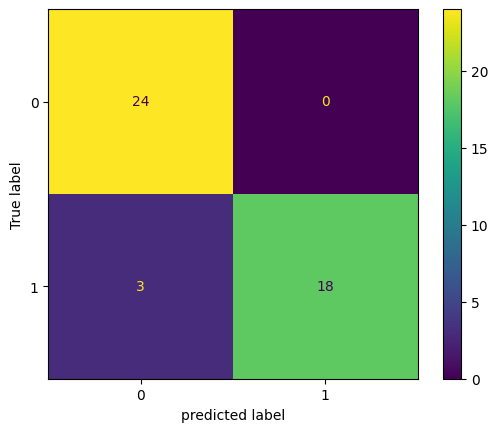

In [ ]:
from sklearn import metrics

confusion_mat = metrics.confusion_matrix(validation_data.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,
                                            display_labels=labels_list)
cm_display.plot()
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()